<a href="https://colab.research.google.com/github/shivashukla02/Company-Bankruptcy-Prediction/blob/main/Company_Bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Company Bankruptcy



##### **Project Type**    -Classification
##### **Contribution**    - Team
##### **Team Member 1 -**NEEL NAIK
##### **Team Member 2 -**PIYUSH NIRVAN
##### **Team Member 3 -**SHIVANK SHUKLA
##### **Team Member 4 -**SARANSH JAIN

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.


# <font color="sky blue"> **Problem Statement**</font><hr color="grey">
Prediction of bankruptcy is a phenomenon of increasing interest to firms who stand to loose money because on unpaid debts. Since computers can store huge dataset pertaining to bankruptcy making accurate predictions from them before hand is becoming important.

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

In this project you will use various classification algorithms on bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
#Importing required libraries for EDA
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns, datetime, ast, time, sys, math
from collections import Counter


# default='warn'. suppresing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
#For showing all outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
#Noting the starting time of the code execution.
t1 = time.time()

#setting the notebook.
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset(shivank)
df_company=pd.read_csv('/content/drive/MyDrive/COMPANY BANKRUPTCY PREDICTION.csv')

In [ ]:
#path of the required csv files. (Piyush)
#df_company = pd.read_csv('/content/drive/MyDrive/Capstone_Company_Bankruptcy_Prediction/Data_Source/COMPANY BANKRUPTCY PREDICTION.csv')

In [ ]:
#path of the required csv files. (Piyush)
#df_company = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project III/Data/COMPANY BANKRUPTCY PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
print('------------------------------------Head---------------------------------------\n')
df_company.head()            #checking 1st 5 rows of the df

print('\n------------------------------------Tail---------------------------------------\n')
df_company.tail()            #checking last 5 rows of the df


------------------------------------Head---------------------------------------



Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     


------------------------------------Tail---------------------------------------



Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  \
6814                                      0.303510   
6815                                      0.303520   
6816                                      0.303512   
6817                                      0.303498   
6818                                      0.313415   

       Continuous interest rate (after tax)   Operating Expense Rate  \
6814                               0.781588             1.510213e-04   
6815                               0.781586             5.220000e+09   
6816                               0.781546             2.509312e-04   
6817                               0.781663             1.236154e-04   
6818                               0.786079             1.431695e-03   

       Research and development expense rate   Cash flow rate  \
6814                            4.500000e+09         0.463734   
6815                            1.440000e+09         0.461978   
6816                            1.039086e-04         0.472189   
6817                            2.510000e+09         0.476123   
6818                            0.000000e+00         0.427721   

       Interest-bearing debt interest rate   Tax rate (A)  \
6814                          1.790179e-04       0.113372   
6815                          2.370237e-04       0.371596   
6816                          0.000000e+00       0.490839   
6817                          2.110211e-04       0.181294   
6818                          5.900000e+08       0.000000   

       Net Value Per Share (B)   Net Value Per Share (A)  \
6814                  0.175045                  0.175045   
6815                  0.181324                  0.181324   
6816                  0.269521                  0.269521   
6817                  0.213392                  0.213392   
6818                  0.220766                  0.220766   

       Net Value Per Share (C)   Persiste

### Dataset Rows & Columns count

In [ ]:
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {df_company.shape[0]}, Columns: {df_company.shape[1]}\n')  


------------------------------------Shape-------------------------------------

Rows: 6819, Columns: 96



### Dataset Information

In [ ]:
print('------------------------------------Info--------------------------------------\n')
df_company.info()            #information about the df

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rat

In [ ]:
# data description
df_company.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

#### Duplicate Values

In [ ]:
# To find the duplicate values
df_company.duplicated().sum()

0

This data set does'nt contain any duplicate rows.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df_company.isnull().values.any()

False

In [ ]:
print('Total number of null value is :',df_company.isnull().sum().max())

Total number of null value is : 0


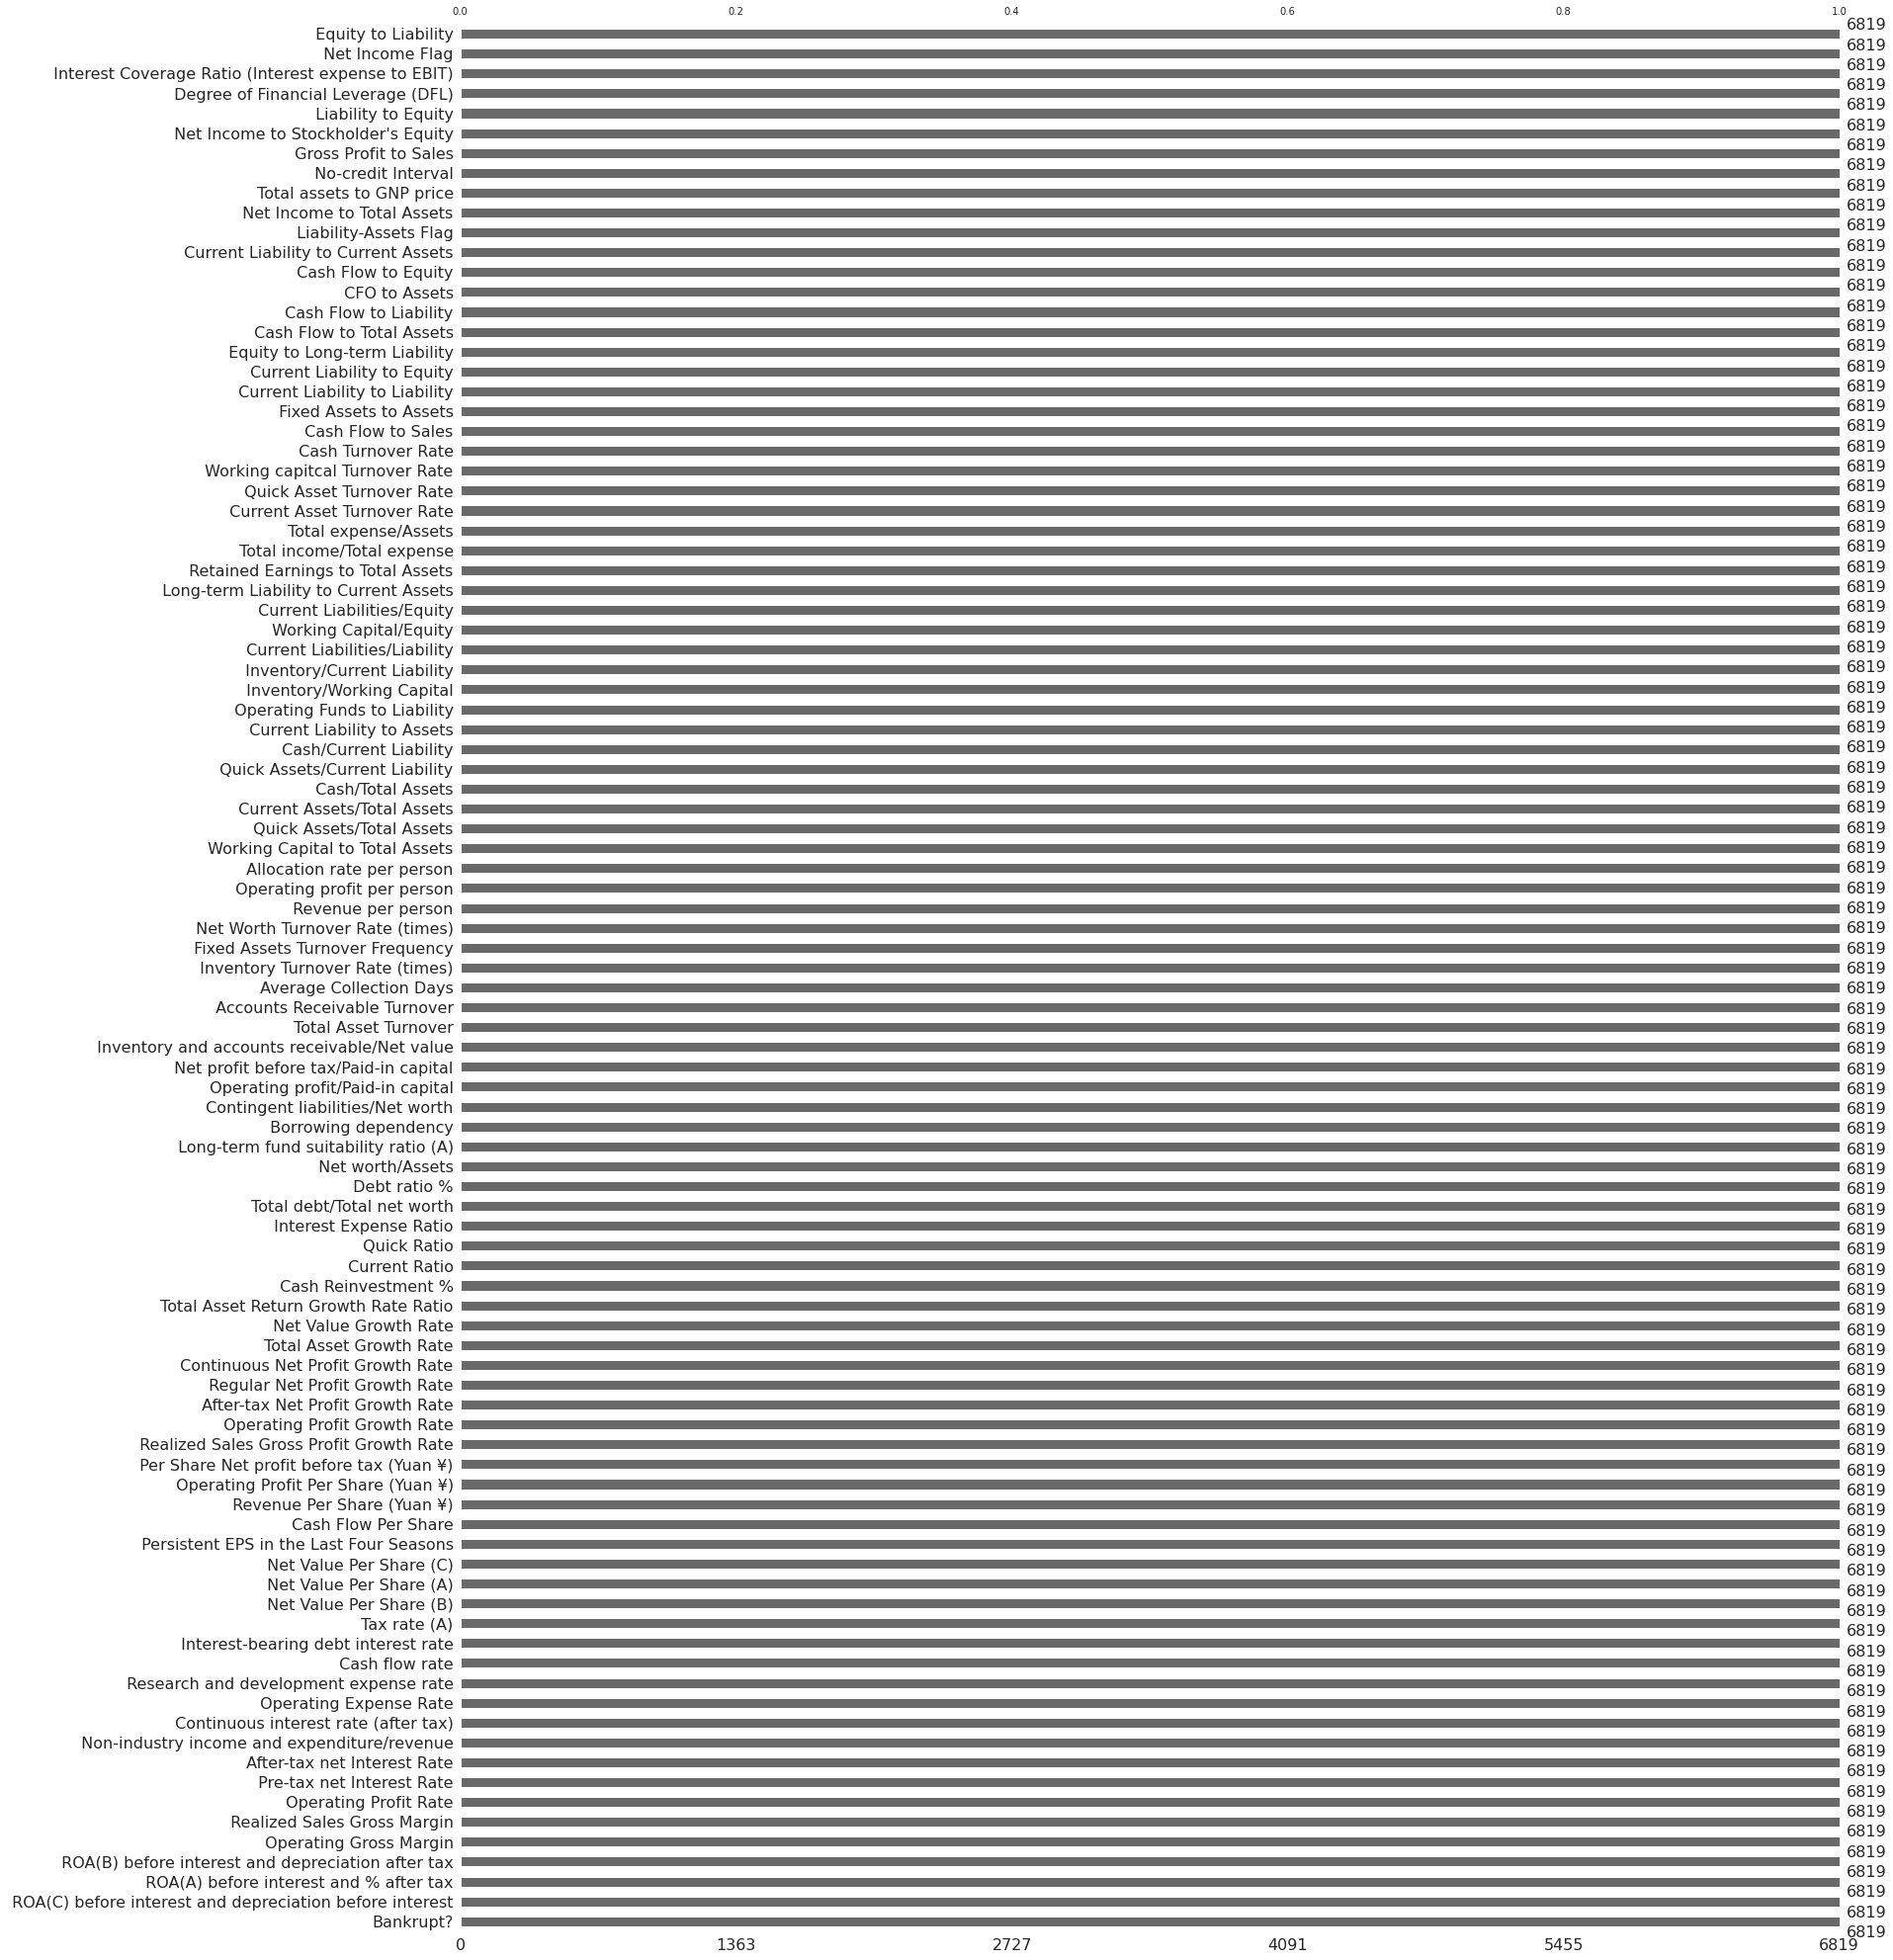

In [ ]:
# Visualizing the missing values

import missingno as msno 

msno.bar(df_company)

### What did you know about your dataset?



*   There are total 96 differet variables.
*   Bankruptcy is our dependent variable.
*   There are no missing or null values.
*   There are total 6819 rows of data.
*   There were no duplicate values found.


I. Fortunately we don't have any missing values, inspecting missing values    using isnull() and missingno function gave the same result. By visualization we see that in each column we have 6819 non null values.

II. The dataset has 6819 rows and 96 columns, there are 95 dimensions in data, leaving column 'Bankrupt?' which is the target to predict, regarded as the y of data.

III. The 'Bankrupt?' column consists of label '1' and '0', and the label '1' points to the bankrupt condition of company, the label '0' means not bankrupt. The number of bankrupt company : not bankrupt company =1:30, as we turn it into binary classifier problem.

IV. Missing value analysis, According to the statistics, there are no missing values in 95 feature columns, which have relatively complete features and little interference to model prediction. So instead of removing any of the original features, we use automatic model selection, as the model can automatically assign wiehgt of the features.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_company.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
# Dataset Describe
df_company.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

### Variables Description 

* The features in the data set and their description are:

* Bankrupt?: Class label 1 : Yes , O: No


* ROA(C) before interest and depreciation before interest: Return On Total Assets(C)


* ROA(A) before interest and % after tax: Return On Total Assets(A)


* ROA(B) before interest and depreciation after tax: Return On Total Assets(B)


* Operating Gross Margin: Gross Profit/Net Sales


* Realized Sales Gross Margin: Realized Gross Profit/Net Sales


* Operating Profit Rate: Operating Income/Net Sales


* Pre-tax net Interest Rate: Pre-Tax Income/Net Sales


* After-tax net Interest Rate: Net Income/Net Sales


* Non-industry income and expenditure/revenue: Net Non-operating Income Ratio


* Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales


* Operating Expense Rate: Operating Expenses/Net Sales


* Research and development expense rate: (Research and Development Expenses)/Net Sales


* Cash flow rate: Cash Flow from Operating/Current Liabilities


* Interest-bearing debt interest rate: Interest-bearing Debt/Equity


* Tax rate (A): Effective Tax Rate


* Net Value Per Share (B): Book Value Per Share(B)


* Net Value Per Share (A): Book Value Per Share(A)


* Net Value Per Share (C): Book Value Per Share(C)


* Persistent EPS in the Last Four Seasons: EPS-Net Income


* Cash Flow Per Share


* Revenue Per Share (Yuan ¥): Sales Per Share


* Operating Profit Per Share (Yuan ¥): Operating Income Per Share


* Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share


* Realized Sales Gross Profit Growth Rate


* Operating Profit Growth Rate: Operating Income Growth


* After-tax Net Profit Growth Rate: Net Income Growth


* Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth


* Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss 
  Growth


* Total Asset Growth Rate: Total Asset Growth


* Net Value Growth Rate: Total Equity Growth


* Total Asset Return Growth Rate Ratio: Return on Total Asset Growth


* Cash Reinvestment %: Cash Reinvestment Ratio


* Current Ratio


* Quick Ratio: Acid Test


* Interest Expense Ratio: Interest Expenses/Total Revenue


* Total debt/Total net worth: Total Liability/Equity Ratio


* Debt ratio %: Liability/Total Assets


* Net worth/Assets: Equity/Total Assets


* Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets


* Borrowing dependency: Cost of Interest-bearing Debt


* Contingent liabilities/Net worth: Contingent Liability/Equity


* Operating profit/Paid-in capital: Operating Income/Capital


* Net profit before tax/Paid-in capital: Pretax Income/Capital


* Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity


* Total Asset Turnover


* Accounts Receivable Turnover


* Average Collection Days: Days Receivable Outstanding


* Inventory Turnover Rate (times)


* Fixed Assets Turnover Frequency


* Net Worth Turnover Rate (times): Equity Turnover


* Revenue per person: Sales Per Employee


* Operating profit per person: Operation Income Per Employee


* Allocation rate per person: Fixed Assets Per Employee


* Working Capital to Total Assets


* Quick Assets/Total Assets


* Current Assets/Total Assets


* Cash/Total Assets


* Quick Assets/Current Liability


* Cash/Current Liability


* Current Liability to Assets


* Operating Funds to Liability


* Inventory/Working Capital


* Inventory/Current Liability


* Current Liabilities/Liability


* Working Capital/Equity


* Current Liabilities/Equity


* Long-term Liability to Current Assets


* Retained Earnings to Total Assets


* Total income/Total expense


* Total expense/Assets


* Current Asset Turnover Rate: Current Assets to Sales


* Quick Asset Turnover Rate: Quick Assets to Sales


* Working capitcal Turnover Rate: Working Capital to Sales


* Cash Turnover Rate: Cash to Sales


* Cash Flow to Sales


* Fixed Assets to Assets


* Current Liability to Liability


* Current Liability to Equity


* Equity to Long-term Liability


* Cash Flow to Total Assets


* Cash Flow to Liability


* CFO to Assets


* Cash Flow to Equity


* Current Liability to Current Assets


* Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise


* Net Income to Total Assets


* Total assets to GNP price


* No-credit Interval


* Gross Profit to Sales


* Net Income to Stockholder's Equity


* Liability to Equity


* Degree of Financial Leverage (DFL)


* Interest Coverage Ratio (Interest expense to EBIT)


* Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise


* Equity to Liability

Answer Here

*   There only 3 discrete data namely Bankruptcy? ,Liability-Assets Flag, Net income flag.
*   Bankruptcy is the dependent variable and rest are independent variables.



### Check Unique Values for each variable.

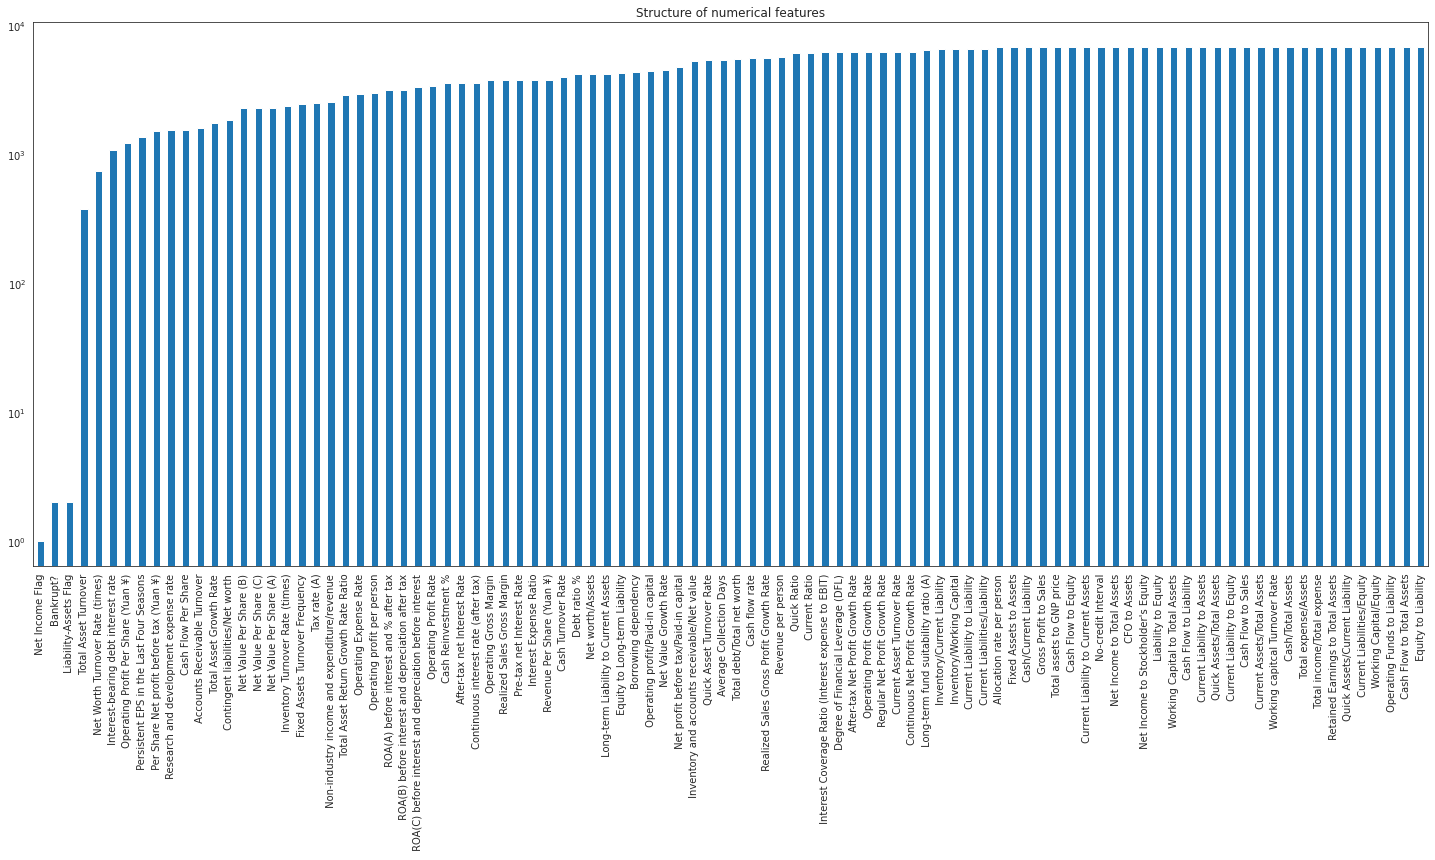

In [ ]:
# Check Unique Values for each variable.

unique_values = df_company.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(25, 10), title="Structure of numerical features")

#Structure of numerical features

This process will give us some insights about the number of binary (2 unique values), ordinal (3 to ~10 unique values) and continuous (more than 10 unique values) features in the dataset.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
df_company.value_counts('Bankrupt?')  

Bankrupt?
0    6599
1     220
dtype: int64

In [ ]:
print(sorted(Counter(df_company['Bankrupt?']).items()))

[(0, 6599), (1, 220)]


<Figure size 648x432 with 0 Axes>

Text(0.5, 1.0, 'Class Distributions \n (0: Failed to go bankrupt || 1: Went bankrupt)')

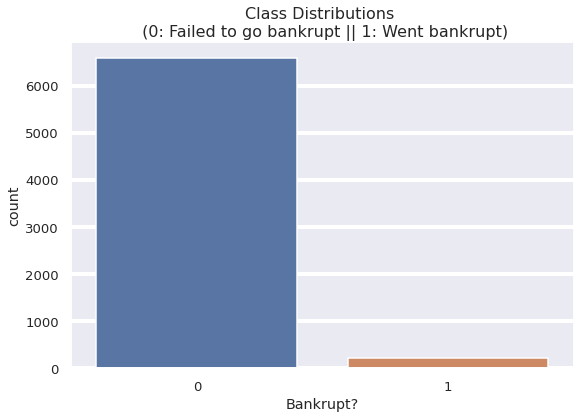

In [ ]:
#analyzing Target variable (Class: 0 = Not Bankrupt, 1 = Bankrupt)

# Checking labels distributions

sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (9,6))
sns.countplot(df_company['Bankrupt?'])
plt.title('Class Distributions \n (0: Failed to go bankrupt || 1: Went bankrupt)', fontsize=16)
plt.show()

Finding the insights, patterns and relations

In [ ]:
flag_col = ['Bankrupt?', ' Net Income Flag']
other_col = [x for x in df_company.columns.to_list() if x not in ['Bankrupt?', ' Net Income Flag']]

<Figure size 2160x5184 with 0 Axes>

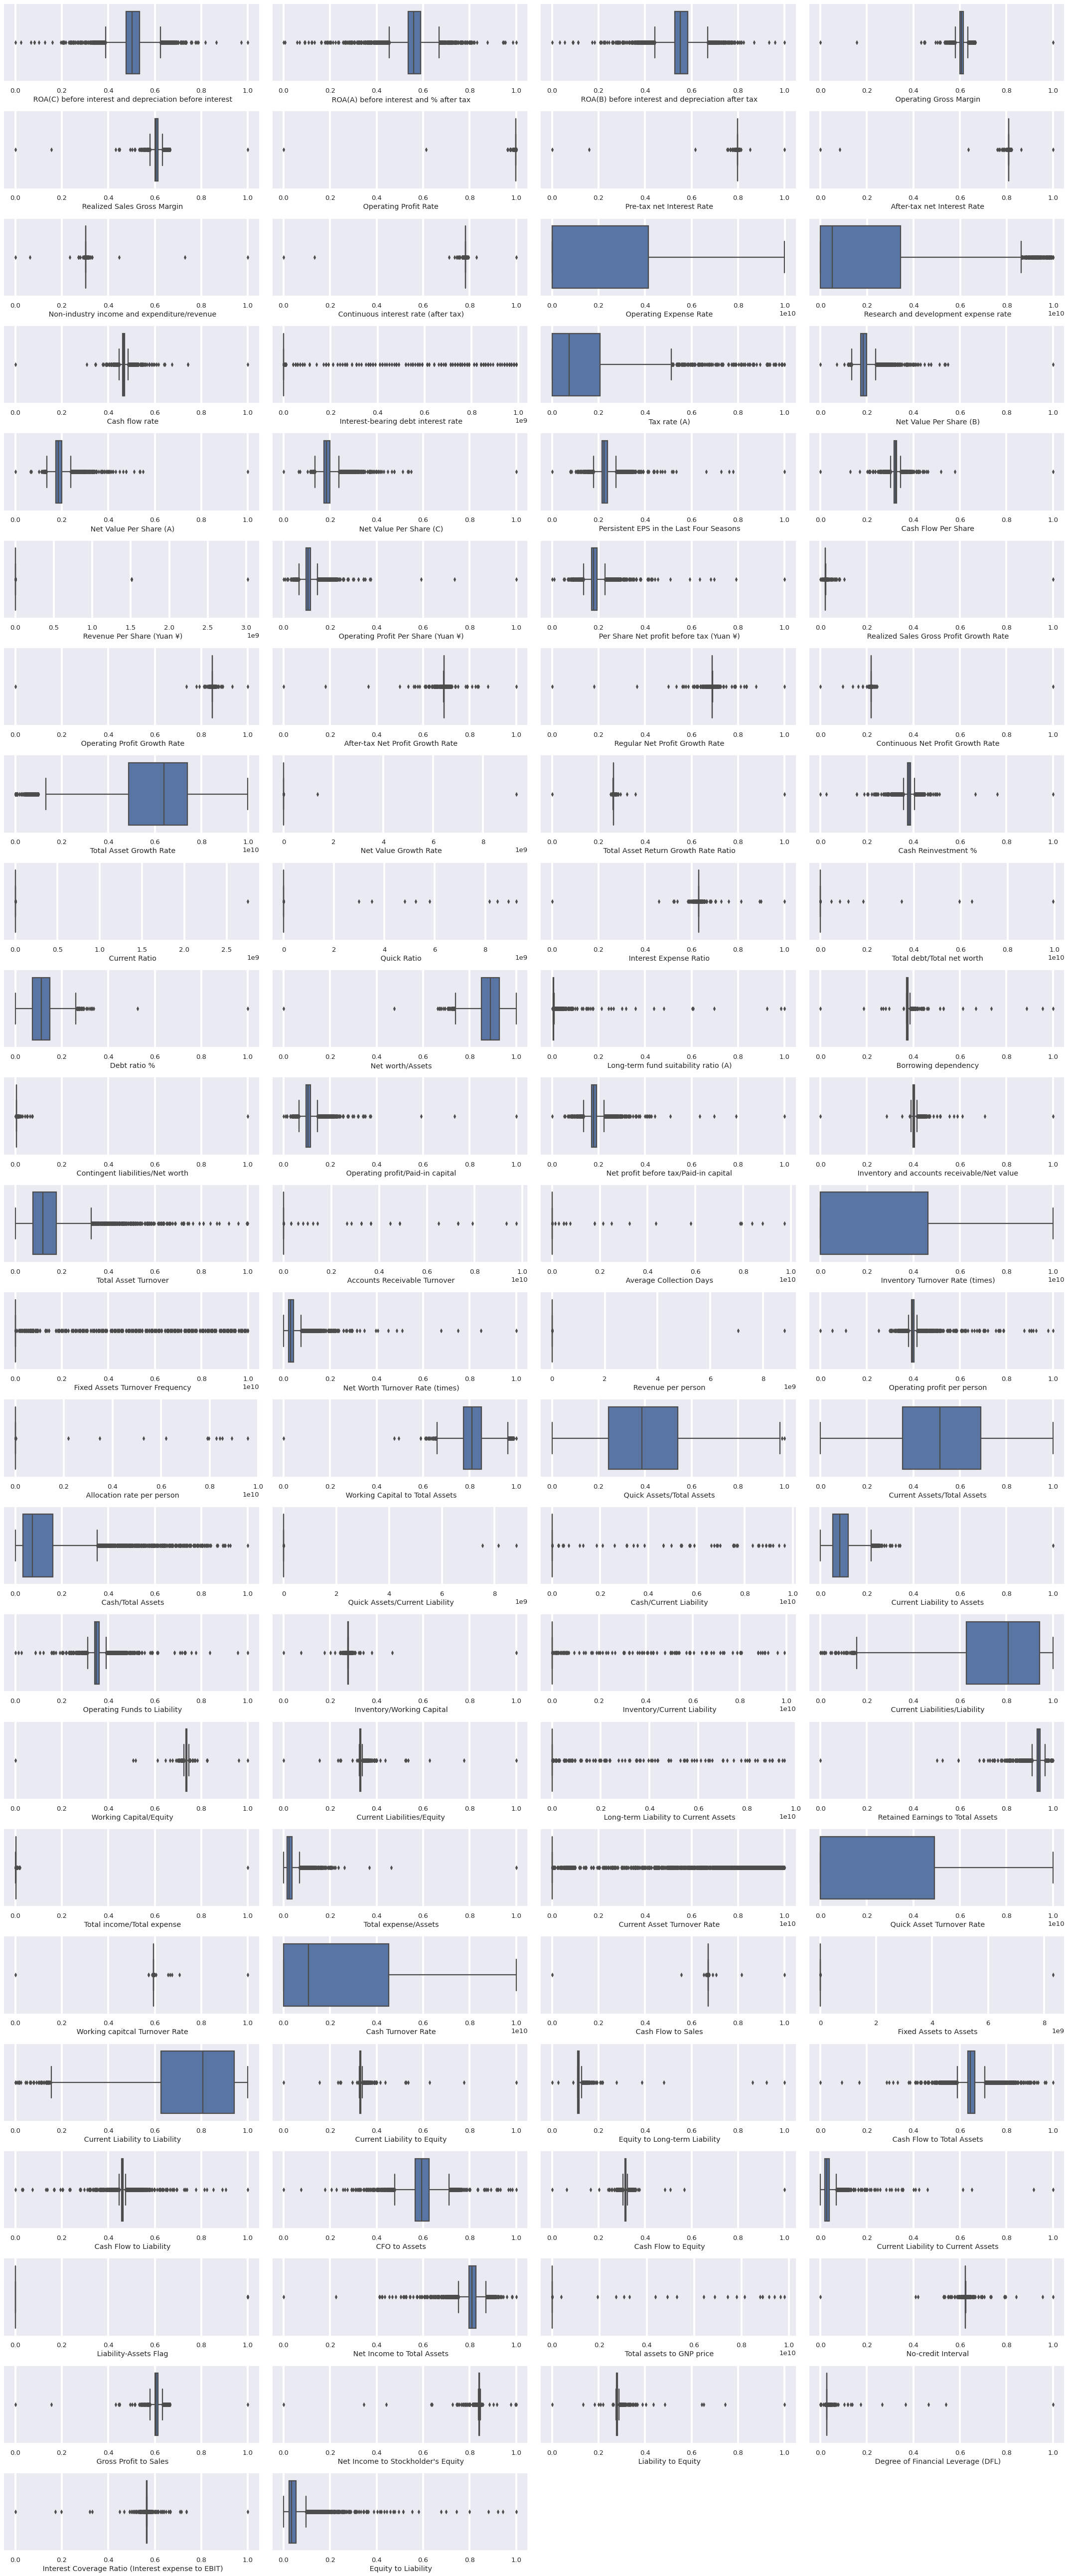

In [ ]:
# Plotting the boxplot for each independent variable
col = 4                           # Number of Columns 
row = int(len(other_col)/col+1)    # Row to autofit the number and size of plots
plt.figure(figsize=(30,row*3)) 
for n,column in enumerate(other_col):
    plot = plt.subplot(row,col,n+1)
    sns.boxplot(x= df_company[column], data = df_company, orient="h").margins(y=0.15)
    plt.tight_layout()

<Figure size 1800x360 with 0 Axes>

Text(0.5, 0, 'Feature name')

Text(0, 0.5, 'Number of outliers')

Text(0.5, 1.0, 'Total Outliers in each column using IQR')

[Text(0, 0, ' Degree of Financial Leverage (DFL)'),
 Text(0, 0, ' Interest Coverage Ratio (Interest expense to EBIT)'),
 Text(0, 0, ' Fixed Assets Turnover Frequency'),
 Text(0, 0, ' Current Asset Turnover Rate'),
 Text(0, 0, ' Total Asset Growth Rate'),
 Text(0, 0, ' Interest Expense Ratio'),
 Text(0, 0, ' Cash Flow to Liability'),
 Text(0, 0, ' No-credit Interval'),
 Text(0, 0, ' Non-industry income and expenditure/revenue'),
 Text(0, 0, ' Cash Flow to Sales'),
 Text(0, 0, ' Continuous Net Profit Growth Rate'),
 Text(0, 0, ' After-tax Net Profit Growth Rate'),
 Text(0, 0, ' Regular Net Profit Growth Rate'),
 Text(0, 0, ' Operating Profit Growth Rate'),
 Text(0, 0, ' Inventory/Working Capital'),
 Text(0, 0, ' Contingent liabilities/Net worth'),
 Text(0, 0, ' Cash Flow to Total Assets'),
 Text(0, 0, ' Operating profit per person'),
 Text(0, 0, ' After-tax net Interest Rate'),
 Text(0, 0, ' Cash Flow to Equity'),
 Text(0, 0, ' Realized Sales Gross Profit Growth Rate'),
 Text(0, 0, ' Lon

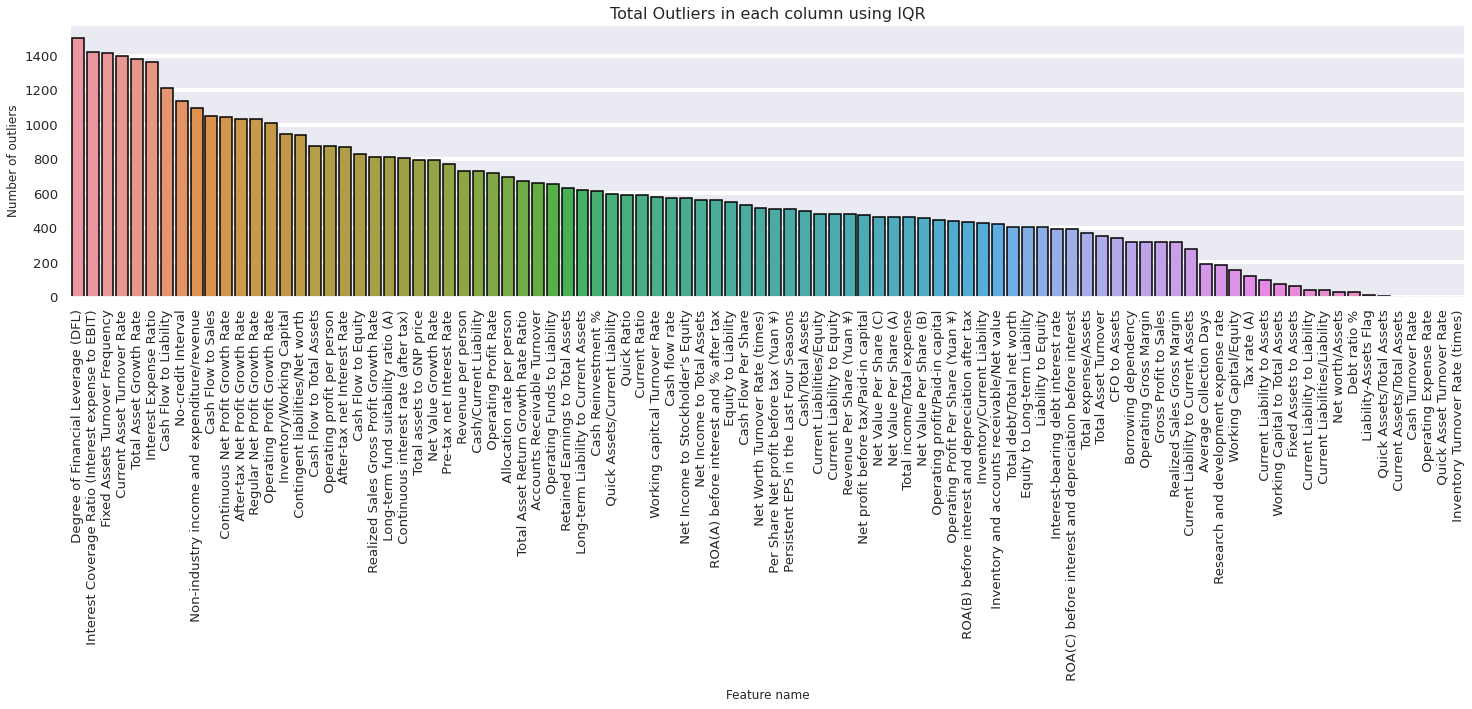

In [ ]:
#Finding the 25th percentile and 75th percentiles.
Q1 = df_company[other_col].quantile(0.25)             
Q3 = df_company[other_col].quantile(0.75)

#Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1                

#Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower_limit=Q1-1.5*IQR                        
upper_limit=Q3+1.5*IQR

# lower_limit = df[Con_col].mean() - 3*df[Con_col].std()
# upper_limit = df[Con_col].mean() + 3*df[Con_col].std()

# lower_limit = df[Con_col].quantile(0.003)
# upper_limit = df[Con_col].quantile(0.997)

outliers_df = ((df_company[other_col]<lower_limit) | (df_company[other_col]>upper_limit)).sum().to_frame().sort_values( by=[0], ascending = False ).reset_index()

plt.figure(figsize=(25,5))

plot = sns.barplot(x = 'index', y = 0,  data = outliers_df,  edgecolor='black')


plt.xlabel('Feature name', fontsize=12)
plt.ylabel('Number of outliers', fontsize=12)
plt.title('Total Outliers in each column using IQR', fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='center')


plt.show()

In [ ]:
# Apply Capping(Winsorization) 
def outlier_handle(df, col_list):
    df_new = df.copy()
    for col_name in col_list:
        fence_low = df[col_name].quantile(0.005) 
        fence_high = df[col_name].quantile(0.995)

        # Capping Outliers using IQR method
        df_new.loc[:,  col_name] = np.where(df[col_name] >= fence_high, fence_high,
                                              np.where(df[col_name] <= fence_low,fence_low,
                                                       df[col_name]))
    return df_new
# Lets get the amount of outliers in each numerical columns
df = outlier_handle(df_company,other_col)

<Figure size 2160x5184 with 0 Axes>

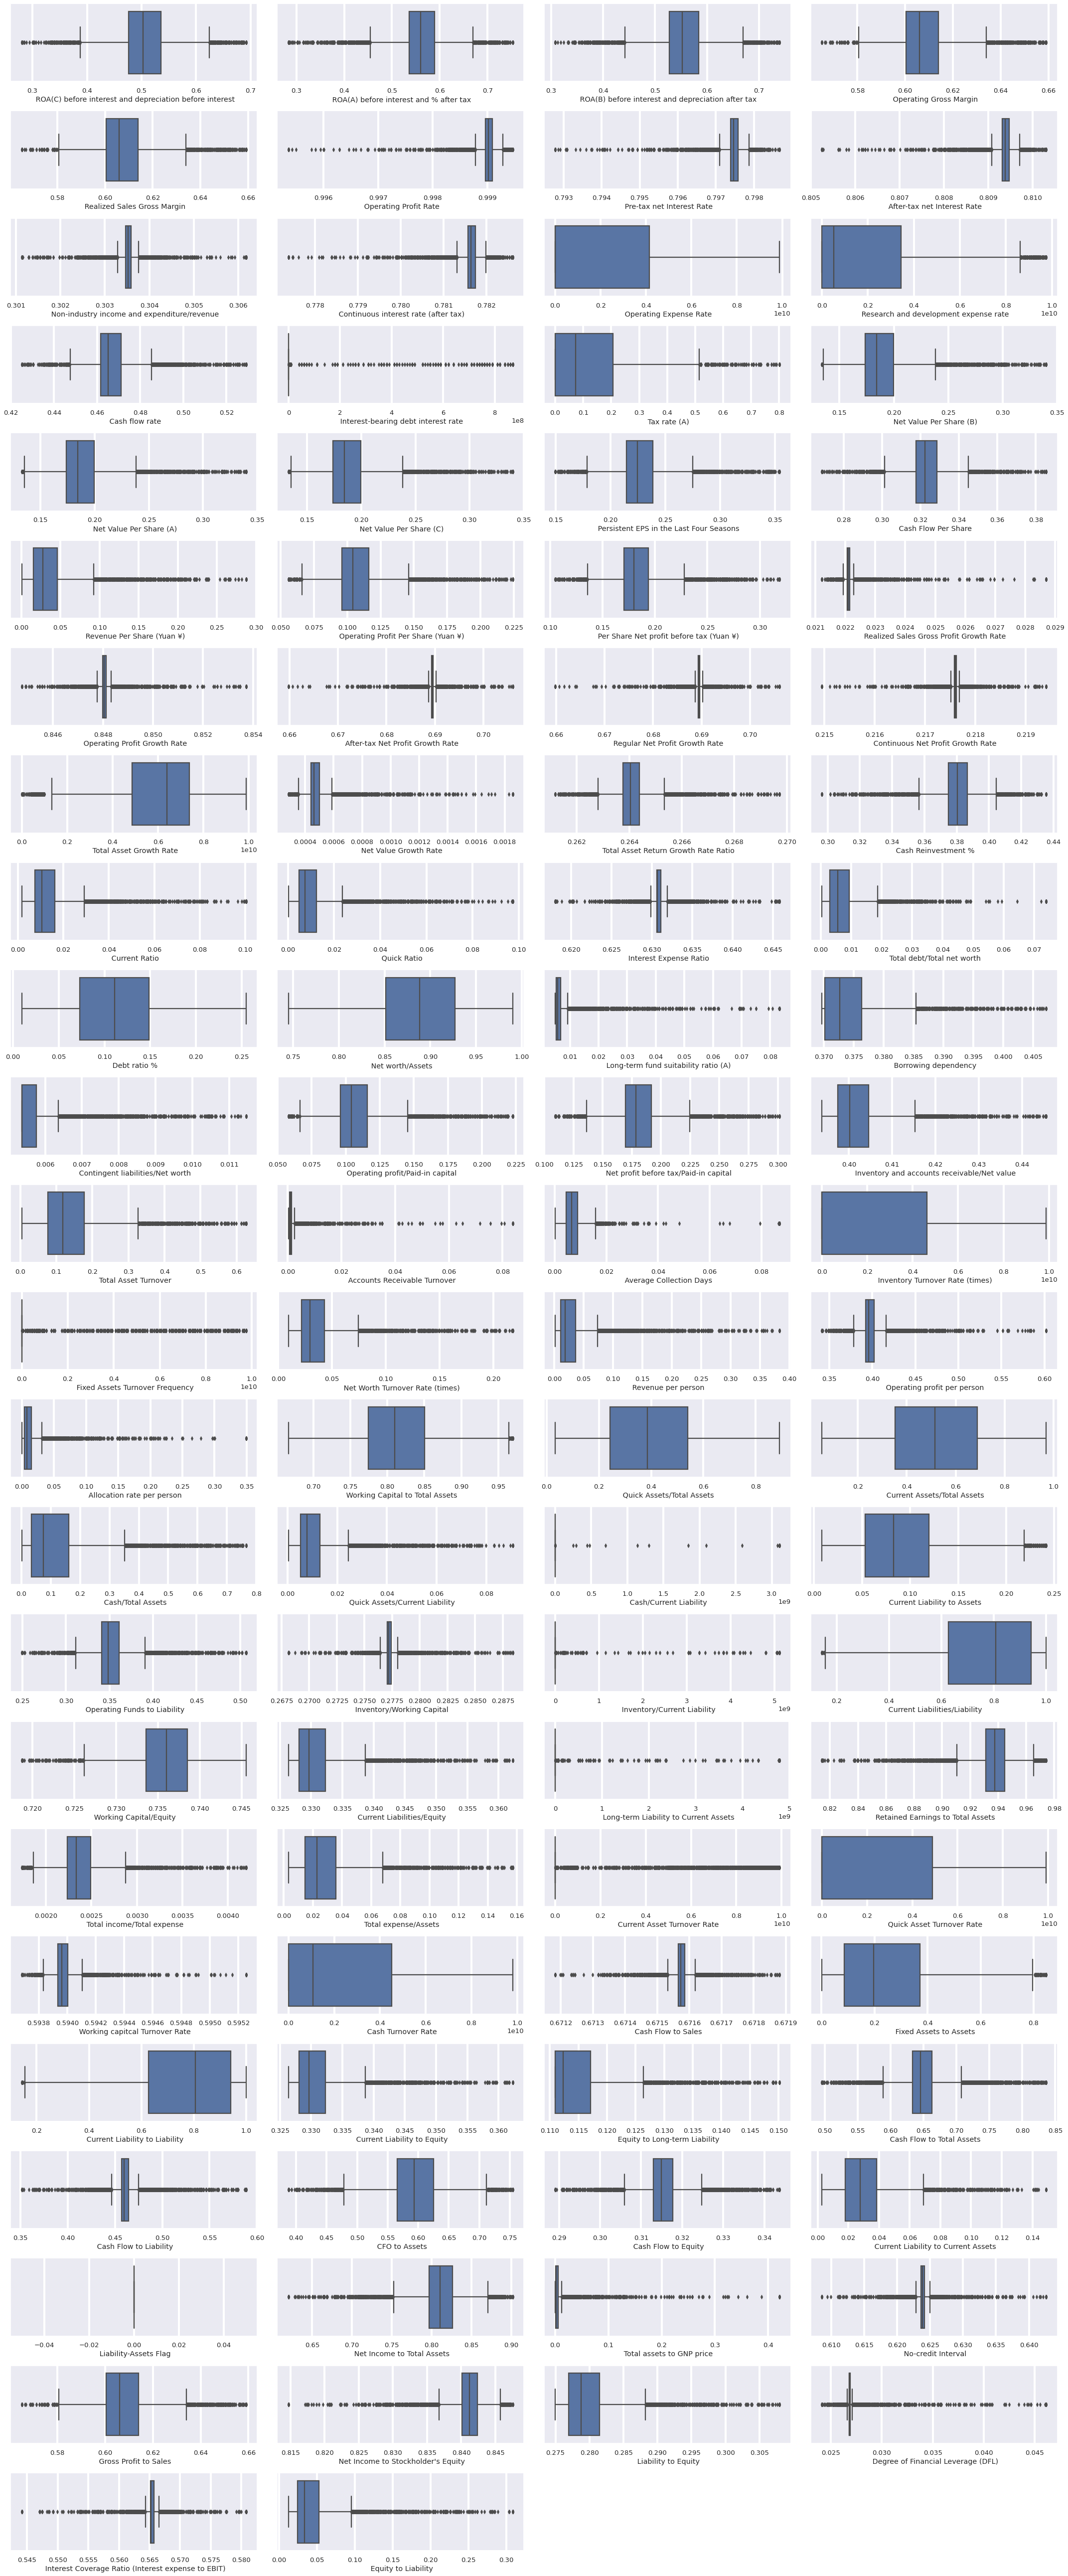

In [ ]:
# Plotting the boxplot for each independent variable
col = 4                           # Number of Columns 
row = int(len(other_col)/col+1)    # Row to autofit the number and size of plots
plt.figure(figsize=(30,row*3)) 
for n,column in enumerate(other_col):
    plot = plt.subplot(row,col,n+1)
    sns.boxplot(x= df[column], data = df, orient="h").margins(y=0.15)
    plt.tight_layout()

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 7200x4320 with 0 Axes>

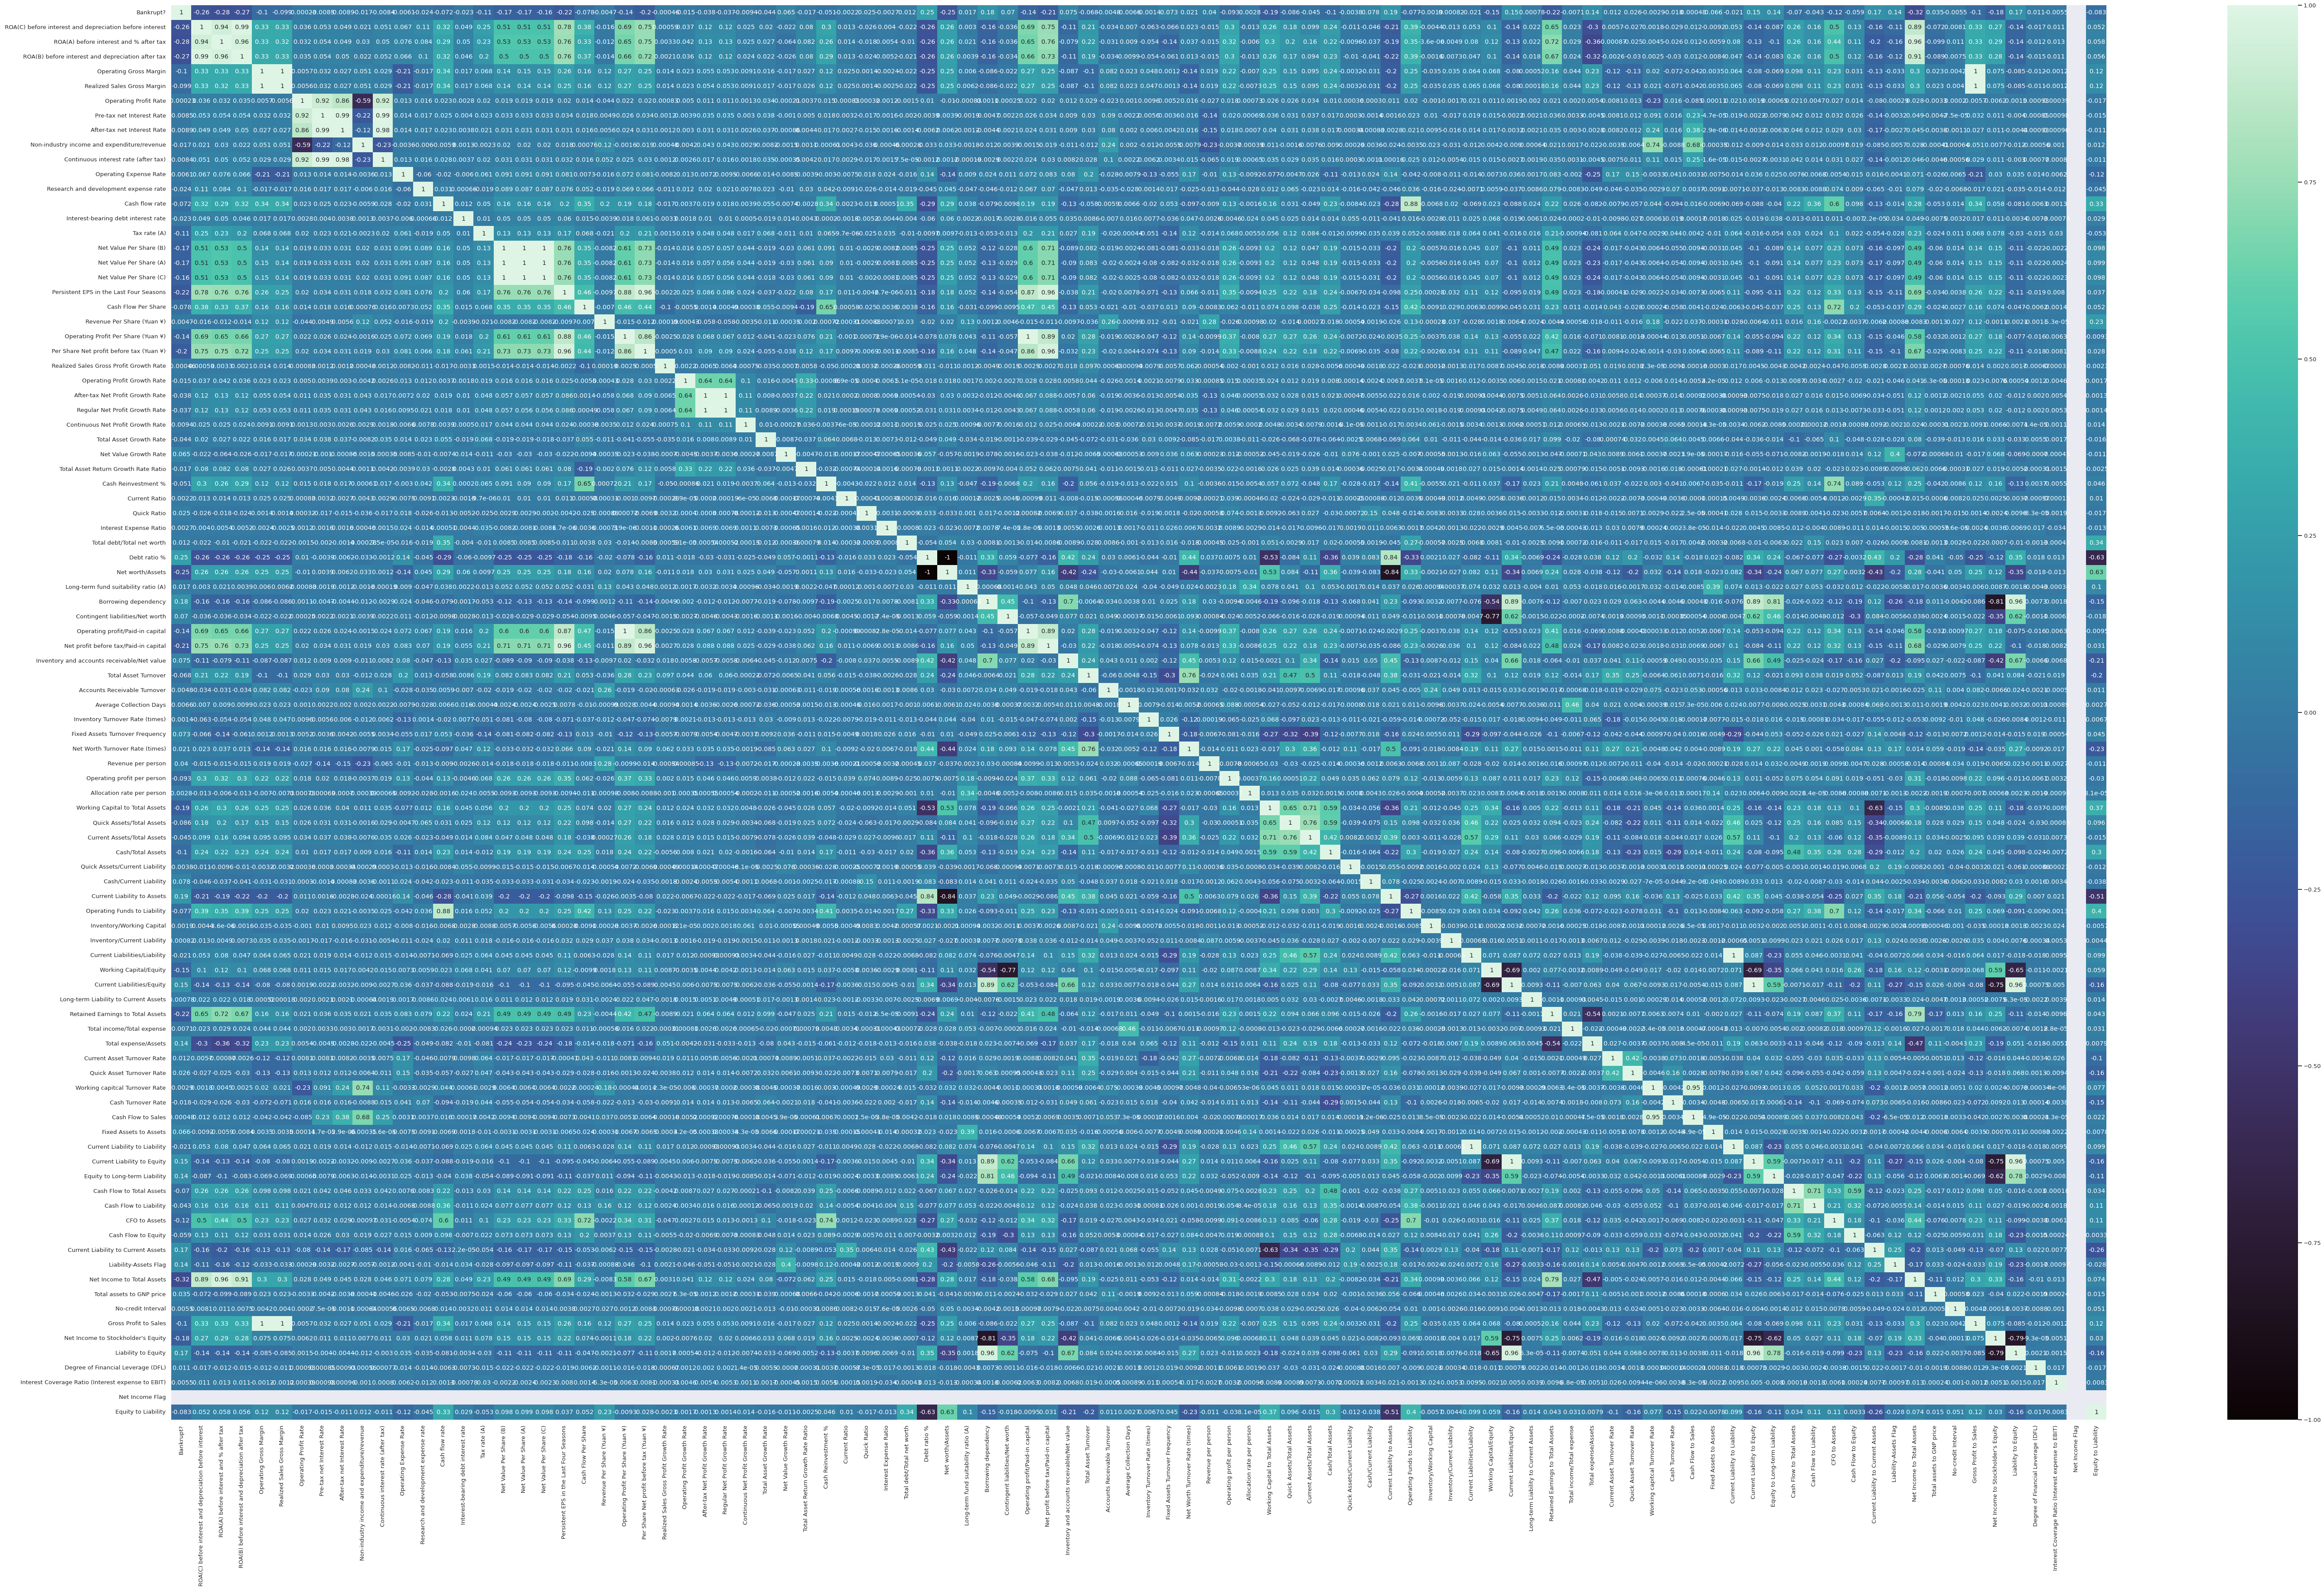

In [33]:
# Chart - 1 visualization code
plt.figure(figsize = [100,60])
sns.heatmap(data = df_company.corr(),annot = True, cmap = 'mako')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [56]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [57]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [58]:
# Remove Stopwords

In [59]:
# Remove White spaces

#### 6. Rephrase Text

In [60]:
# Rephrase Text

#### 7. Tokenization

In [61]:
# Tokenization

#### 8. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [63]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [67]:
# Transform Your data

### 6. Data Scaling

In [68]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [69]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [71]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [72]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [77]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [78]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [80]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [81]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***